In [3]:
pip install pandas numpy matplotlib mlxtend scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Bagging

In [4]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

In [5]:
data=load_iris()

In [6]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
d={
   'sepal length (cm)':data.data[50:,1],
    'petal length (cm)':data.data[50:,2],
    'Species':np.array([i for i in data.target if i>0])
}

In [9]:
df=pd.DataFrame(d)

In [ ]:
df

,sepal length (cm),petal length (cm),Species
0,3.2,4.7,1
1,3.2,4.5,1
2,3.1,4.9,1
3,2.3,4.0,1
4,2.8,4.6,1
...,...,...,...
95,3.0,5.2,2
96,2.5,5.0,2
97,3.0,5.2,2
98,3.4,5.4,2


Now we will suffle

In [ ]:
df=df.sample(df.shape[0])
df

,sepal length (cm),petal length (cm),Species
8,2.9,4.6,1
95,3.0,5.2,2
68,2.6,6.9,2
97,3.0,5.2,2
70,3.2,5.7,2
...,...,...,...
2,3.1,4.9,1
99,3.0,5.1,2
69,2.2,5.0,2
98,3.4,5.4,2


In [ ]:
df_train=df.loc[:60,:].sample(10)
df_train

df_test=df.loc[60:,:].sample(10)

In [ ]:
df_tt=df_test.sample(5,replace=True)
df_tt


,sepal length (cm),petal length (cm),Species
4,2.8,4.6,1
69,2.2,5.0,2
50,3.3,6.0,2
23,2.8,4.7,1
40,2.6,4.4,1


In [ ]:
x_test = df_tt.iloc[:, :-1].values  # Select all rows and all columns except the last one
y_test = df_tt.iloc[:, -1].values   # Select all rows and only the last column


In [ ]:
#models -> Random samples
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score
from mlxtend.plotting import  plot_decision_regions
import matplotlib.pyplot as plt

def evaluate(model, X, y):
    model.fit(X, y)
    plot_tree(model)
    plt.show()
    
    filler_feature_values = None
    
    if X.shape[1] > 2:
        # If X has more than 2 features, provide filler values for additional features
        filler_feature_values = {i: X[:, i].mean() for i in range(2, X.shape[1])}
        
    plot_decision_regions(X, y, clf=model, filler_feature_values=filler_feature_values, legend=2)
    plt.show()
    
    y_pred = model.predict(x_test)
    print("y_test", y_test)
    print("y_pred", y_pred)
    
    print("Accuracy score", accuracy_score(y_test, y_pred))
    
    return model

    return model


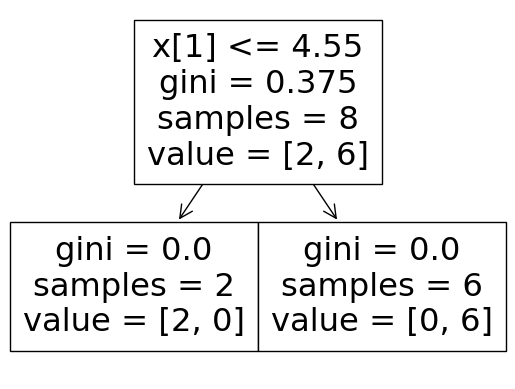

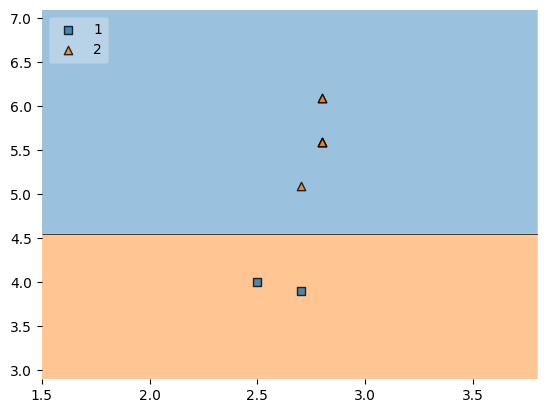

y_test [1 2 2 1 1]
y_pred [2 2 2 2 1]
Accuracy score 0.6


In [ ]:

#first tree

df_t=df_train.sample(8,replace=True)

x_train=df_t.iloc[:,:-1].values
y_train=df_t.iloc[:,-1].values


dt1=DecisionTreeClassifier()
bag1=evaluate(dt1,x_train,y_train)

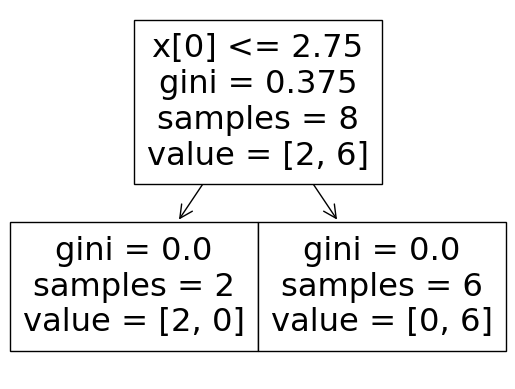

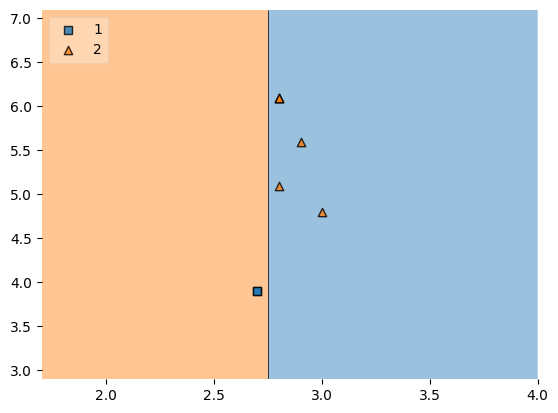

y_test [1 2 2 1 1]
y_pred [2 1 2 2 1]
Accuracy score 0.4


In [ ]:

#second tree

df_t=df_train.sample(8,replace=True)

x_train=df_t.iloc[:,:-1].values
y_train=df_t.iloc[:,-1].values


dt2=DecisionTreeClassifier()
bag2=evaluate(dt2,x_train,y_train)

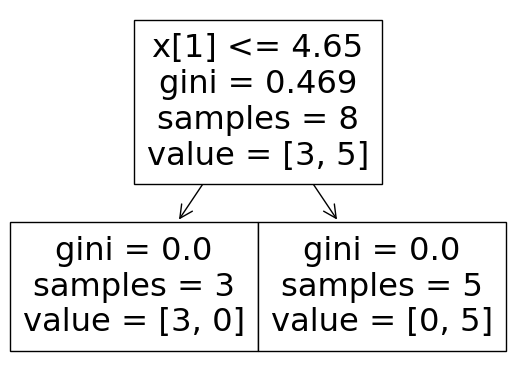

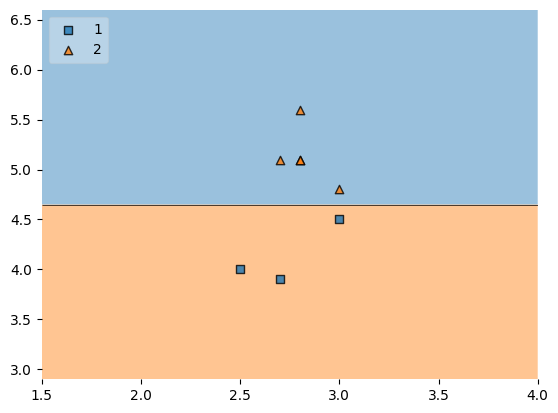

y_test [1 2 2 1 1]
y_pred [1 2 2 2 1]
Accuracy score 0.8


In [ ]:
#Third tree

df_t=df_train.sample(8,replace=True)

x_train=df_t.iloc[:,:-1].values
y_train=df_t.iloc[:,-1].values


dt3=DecisionTreeClassifier()
bag3=evaluate(dt3,x_train,y_train)

Aggrigation

In [ ]:
print("Prediction 1: ",bag1.predict(np.array([2.5,4.9]).reshape(1,2)))
print("Prediction 2: ",bag2.predict(np.array([2.5,4.9]).reshape(1,2)))
print("Prediction 3: ",bag3.predict(np.array([2.5,4.9]).reshape(1,2)))



Prediction 1:  [2]
Prediction 2:  [1]
Prediction 3:  [2]


Stacking

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.tree import DecisionTreeClassifier


In [ ]:
m1=KNeighborsClassifier()
m2=LogisticRegression()
m3=MultinomialNB()
m4=GaussianNB()
m5=DecisionTreeClassifier()

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
model=VotingClassifier([('knn',m1),('lr',m2),('mn',m3),('nb',m4),('dt',m5)])

In [ ]:
df

,sepal length (cm),petal length (cm),Species
8,2.9,4.6,1
95,3.0,5.2,2
68,2.6,6.9,2
97,3.0,5.2,2
70,3.2,5.7,2
...,...,...,...
2,3.1,4.9,1
99,3.0,5.1,2
69,2.2,5.0,2
98,3.4,5.4,2


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:

X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,:-1].values,df.iloc[:,-1].values,test_size=0.2,random_state=42)



In [ ]:
model.fit(X_train,y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier()),
                             ('lr', LogisticRegression()),
                             ('mn', MultinomialNB()), ('nb', GaussianNB()),
                             ('dt', DecisionTreeClassifier())])

In [ ]:
model.score(X_train,y_train)

0.95

In [ ]:
model.score(X_test, y_test)

0.9

Boosting

In [ ]:
# Adaboost

from sklearn.ensemble import AdaBoostClassifier

In [ ]:
abc=AdaBoostClassifier(n_estimators=4,random_state=0)
abc.fit(X_train,y_train)


AdaBoostClassifier(n_estimators=4, random_state=0)

In [ ]:
y_pred=abc.predict(X_test)

In [ ]:
accuracy_score(y_pred,y_test)

0.9